<a href="https://colab.research.google.com/github/duartejr/bootcamp_blue/blob/Gustavo/analise_cluster_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Usando kmeans para análise de cluster

Aqui será usado os atributos nome,categorias, marcas e condições para fazer a análise de cluser usando o algoritmo kmeans, e verificar se esse algoritmo funciona nesse dataset.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [86]:
mercari = pd.read_csv('/content/drive/MyDrive/Datasets/Cópia de train_data (1).csv')
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11


In [87]:
mercari_sel = mercari[['category_1','category_2','category_3',
                       'brand_name','item_condition_id','shipping']]

In [88]:
mercari_sel.head()

,category_1,category_2,category_3,brand_name,item_condition_id,shipping
0,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",No Brand,1,1
1,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",No Brand,1,1
2,Women,Athletic Apparel,Shirts & Tops,Under Armour,2,1
3,Women,Athletic Apparel,Shorts,Nike,3,1
4,Beauty,Makeup,Eyes,No Brand,3,0


In [89]:
mercari_sel.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [90]:
le = LabelEncoder()
le.fit(mercari_sel['category_1'])
mercari_sel['category_1'] = le.transform(mercari_sel['category_1'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
le.fit(mercari_sel['category_2'])
mercari_sel['category_2'] = le.transform(mercari_sel['category_2'])

le.fit(mercari_sel['category_3'])
mercari_sel['category_3'] = le.transform(mercari_sel['category_3'])

le.fit(mercari_sel['brand_name'])
mercari_sel['brand_name'] = le.transform(mercari_sel['brand_name'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [92]:
x = StandardScaler().fit_transform(mercari_sel)

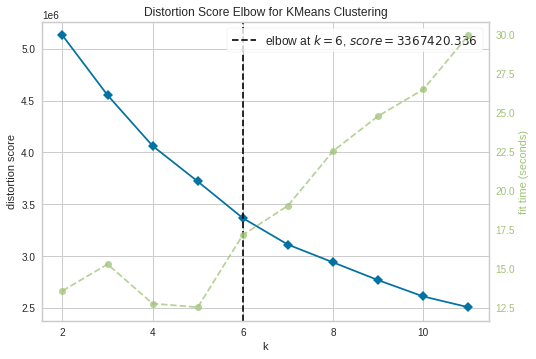

In [93]:
# Aplicando o método do cotovelo
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(x)
visualizer.show()

In [94]:
kmean = KMeans(n_clusters=6).fit(x)

In [95]:
mercari['cluster'] = kmean.labels_

In [96]:
mercari.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock,cluster
0,iphone 6s plus defender case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,10.0,1,protective case for the big iphones 6plus or 6...,15-6-2018,2,4
1,beautiful rainbow eye iphone plus case,Electronics,Cell Phones & Accessories,"Cases, Covers & Skins",1,No Brand,7.0,1,this soft case is brand new and features a bea...,12-12-2018,1,4
2,hold under armour women s t shirt bundle,Women,Athletic Apparel,Shirts & Tops,2,Under Armour,20.0,1,women s under armour t shirts with freedom log...,13-5-2018,11,2
3,nike shorts bundle,Women,Athletic Apparel,Shorts,3,Nike,18.0,1,no description yet,24-2-2018,4,2
4,bare mineral eye shadow lot,Beauty,Makeup,Eyes,3,No Brand,14.0,0,bare mineral eye shadow verity of colors bare ...,29-10-2018,11,1


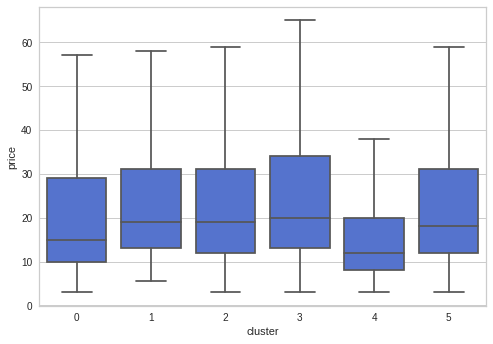

In [125]:
sns.boxplot(x='cluster',y='price',data=mercari,showfliers=False,color='royalblue')

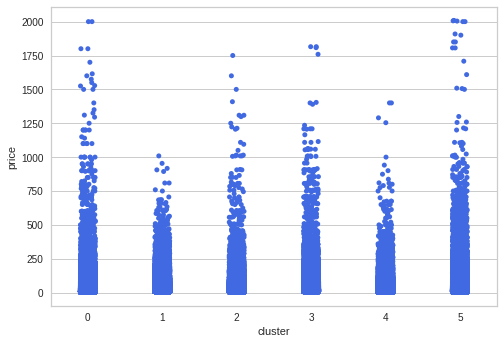

In [124]:
sns.stripplot(x='cluster',y='price',data=mercari,color='royalblue')

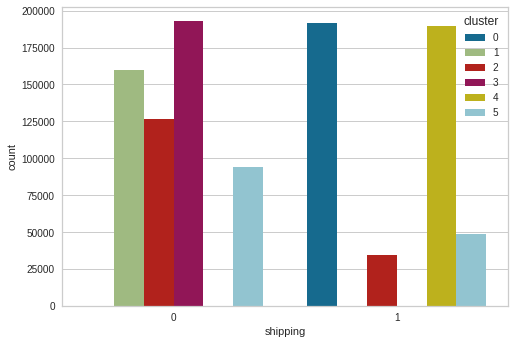

In [99]:
sns.countplot(x='shipping',data=mercari,hue='cluster')

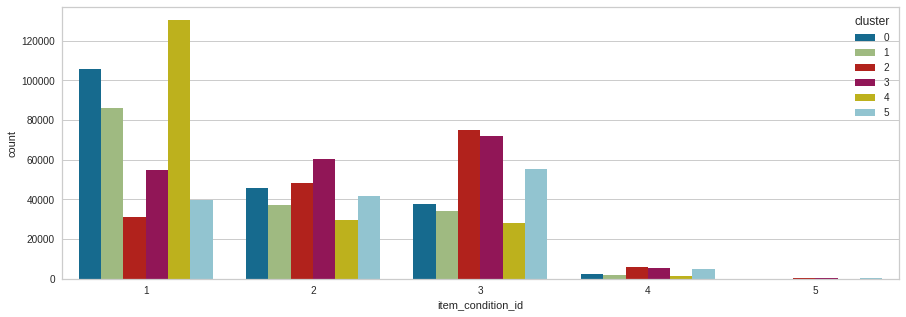

In [123]:
plt.figure(figsize=(15,5))
sns.countplot(x='item_condition_id',data=mercari,hue='cluster')

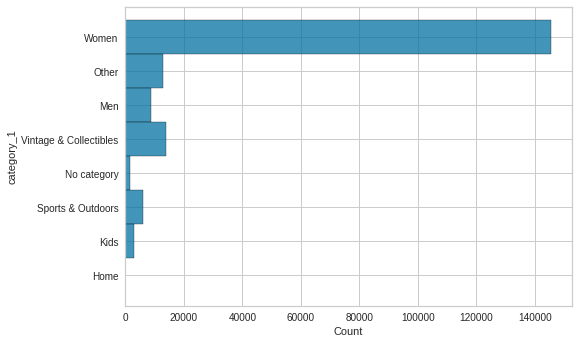

In [100]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==0])

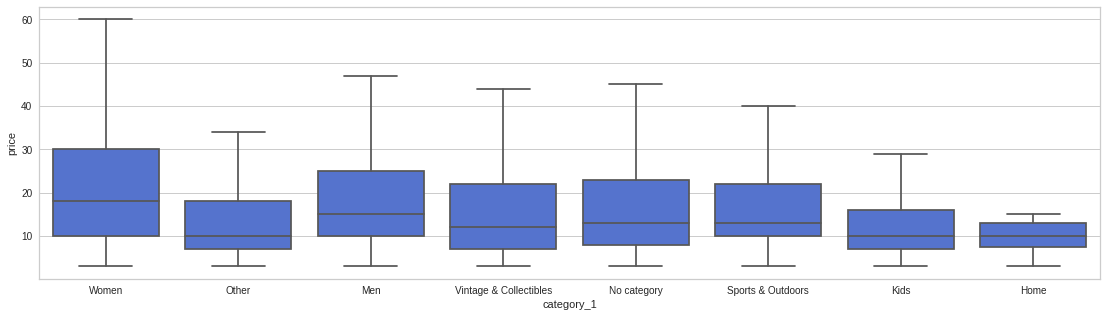

In [101]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==0],showfliers=False,color='royalblue')

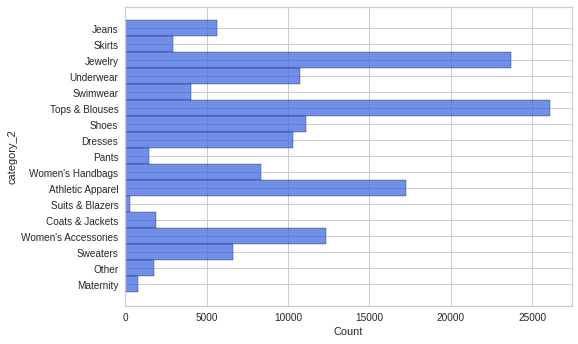

In [118]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==0) & (mercari['category_1']=='Women')],
             color='royalblue')

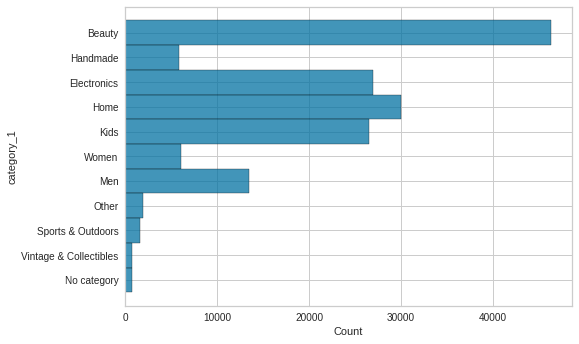

In [102]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==1])

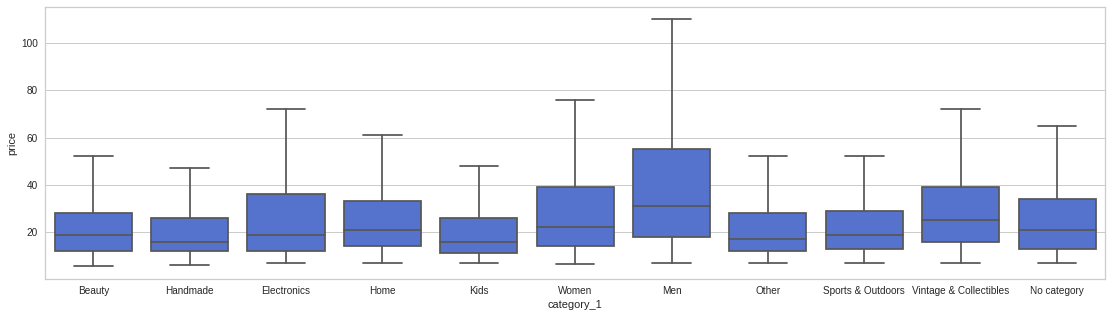

In [103]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==1],showfliers=False,color='royalblue')

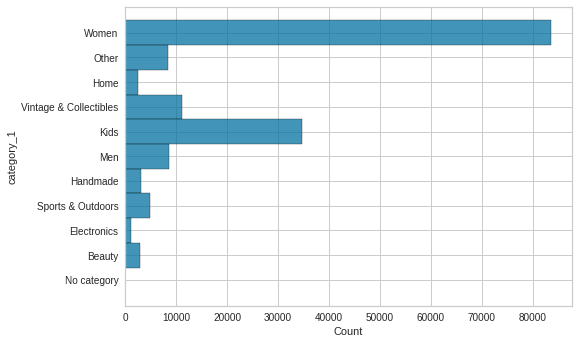

In [104]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==2])

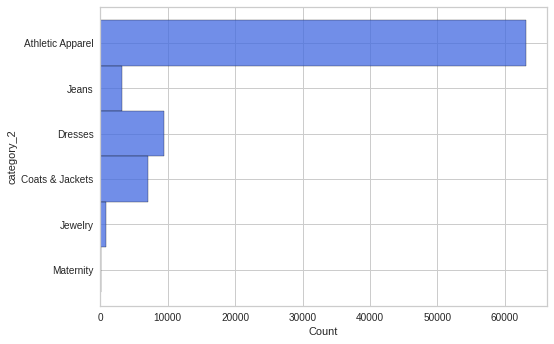

In [119]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==2) & (mercari['category_1']=='Women')],
             color='royalblue')

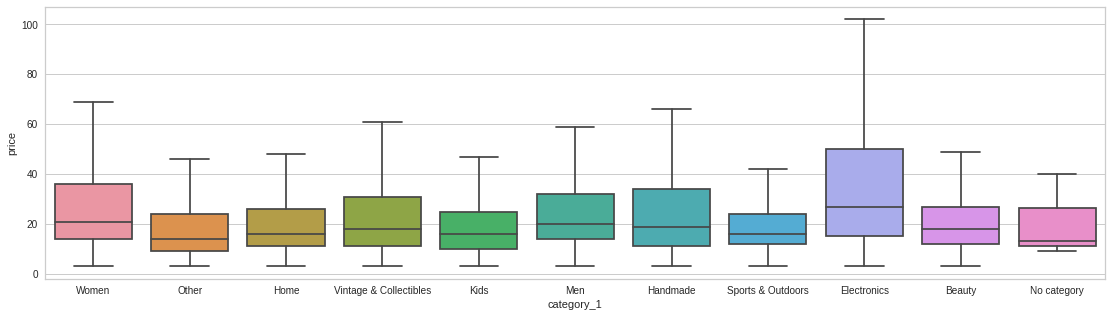

In [105]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==2],showfliers=False)

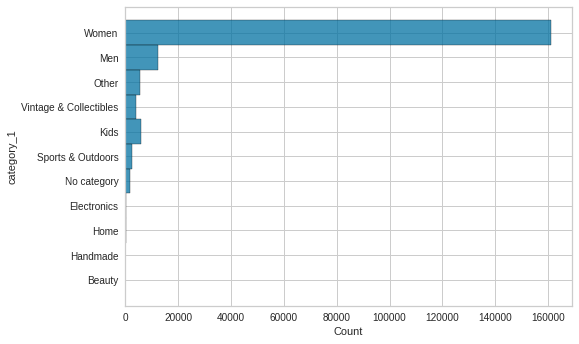

In [106]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==3])

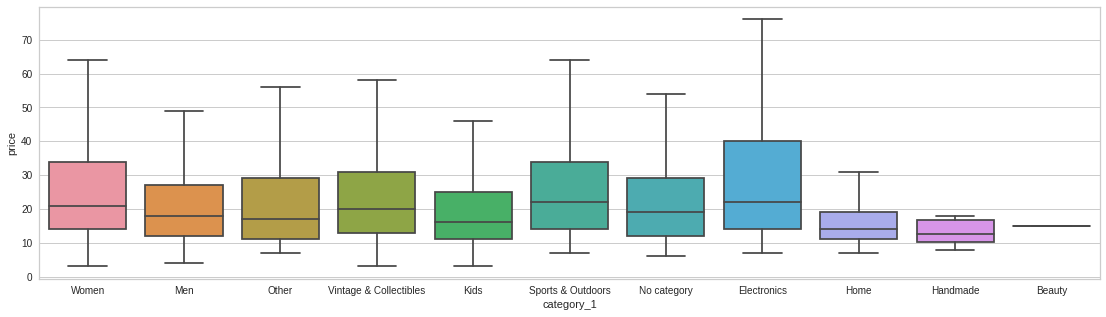

In [107]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==3],showfliers=False)

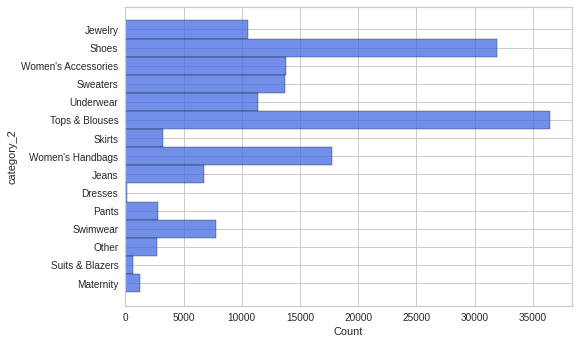

In [120]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==3) & (mercari['category_1']=='Women')],
             color='royalblue')

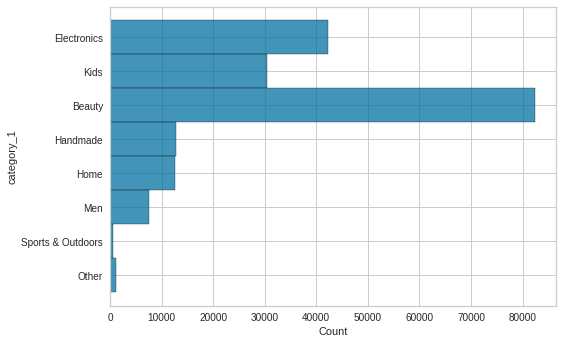

In [108]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==4])

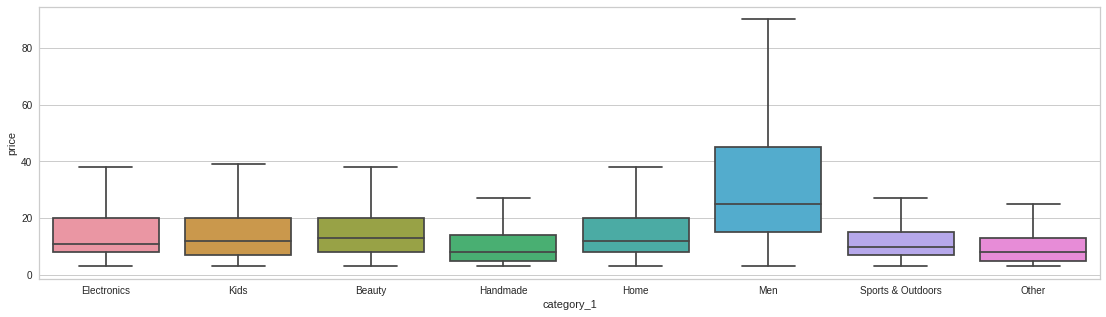

In [109]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==4],showfliers=False)

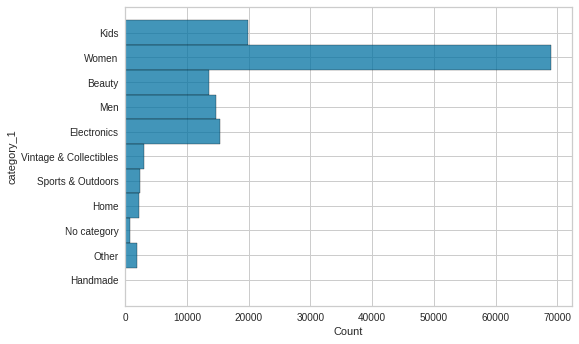

In [110]:
sns.histplot(y='category_1',data=mercari[mercari['cluster']==5])

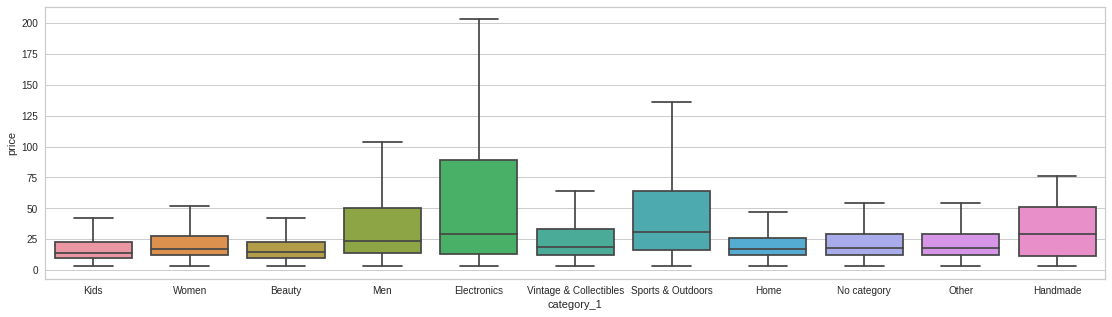

In [111]:
plt.figure(figsize=(19,5))
sns.boxplot(x='category_1',y='price',data=mercari[mercari['cluster']==5],showfliers=False)

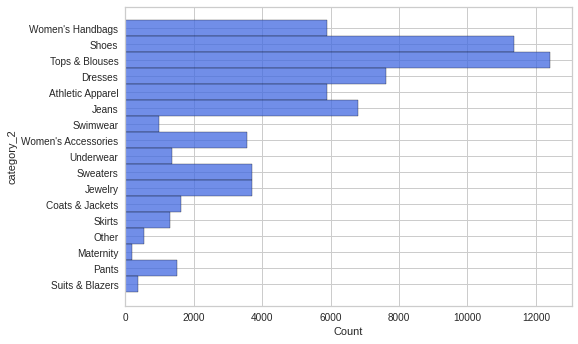

In [121]:
sns.histplot(y='category_2',data=mercari[(mercari['cluster']==5) & (mercari['category_1']=='Women')],
             color='royalblue')